In [297]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# VEST NC 2018

## VEST's Documentation File

Election results and precinct shapefile from the NC State Board of Elections (https://www.ncsbe.gov/results-data)

North Carolina produces two sets of election results data. The precinct results are the unaltered results as initially reported by the counties. Many counties report early votes by vote center while provisional and other nonstandard ballots may be reported countywide. The precinct-sorted results are then produced within 30 days after the election. In the precinct-sorted data nearly all votes are assigned to precincts regardless of the manner by which the ballots were cast. However, North Carolina law requires the addition of statistical "noise" to the precinct-sorted data wherever any given vote by any specific voter may otherwise be deduced via cross referencing the various election-related data sets produced by the SBE.

For the 2018 general election 39 counties reported all votes by precinct in their initial precinct results. The precinct-sorted data set was used instead for the counties listed below.

Ashe, Avery, Beaufort, Bertie, Bladen, Brunswick, Buncombe, Cabarrus, Caldwell, Camden, Caswell, Chatham, Chowan, Cumberland, Currituck, Dare*, Davidson, Davie, Duplin, Durham*, Edgecombe, Forsyth, Greene*, Halifax*, Harnett, Haywood, Henderson, Hyde, Jackson, Johnston, Jones, Lee, Lenoir, Lincoln, Macon*, Martin*, Mecklenburg, Moore, Nash, New Hanover*, Northampton*, Orange, Pamlico, Pender, Perquimans*, Pitt*, Polk, Richmond, Rutherford, Sampson, Scotland, Stanly*, Stokes, Surry, Tyrrell, Wake, Washington*, Watauga, Wayne, Wilkes, Yadkin

In counties marked by asterisk some votes were still reported by vote center or countywide in the precinct-sorted data. These were distributed by candidate to precincts based on the precinct-level reported vote. The precinct-sorted results were further adjusted to match the certified countywide totals based on the precinct-level vote by candidate.  

G18SSCRJAC - Barbara Jackson (Republican Party)  
G18SSCRANG - Christopher (Chris) Anglin (Republican Party)  
G18SSCDEAR - Anita Earls (Democratic Party)  

G18SACRHEA - Andrew T. Heath (Republican Party)  
G18SACDARR - John S. Arrowood (Democratic Party)  

G18SACRGRI - Jefferson G. Griffin (Republican Party)  
G18SACRRAY - Sandra Alice Ray (Republican Party)  
G18SACDHAM - Tobias (Toby) Hampson (Democratic Party)  

G18SACRKIT - Chuck Kitchen (Republican Party)  
G18SACDCOL - Allegra Katherine Collins (Democratic Party)  
G18SACLMON - Michael Monaco, Sr. (Libertarian Party)  

## Load VEST's Final File

In [298]:
vest_shp = gp.read_file("./raw-from-source/VEST/nc_2018/nc_2018.shp")

In [299]:
vest_shp.shape

(2706, 16)

In [300]:
vest_shp.head(1)

,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G18SSCRJAC,G18SSCRANG,G18SSCDEAR,G18SACRHEA,G18SACDARR,G18SACRGRI,G18SACRRAY,G18SACDHAM,G18SACRKIT,G18SACDCOL,G18SACLMON,geometry
0,06N,06N_NORTH GRAHAM,ALAMANCE,1,197,131,646,329,640,227,111,627,307,617,45,"POLYGON ((1884558.650 851226.326, 1885054.111 851287.359, 1885057.663 852495.589, 1885153.000 852470.461, 1885655.646 852333.803, 1885814.154 852293.141, 1885823.418 851409.219, 1886074.873 851410.426, 1886244.139 851399.576, 1886468.226 851047.774, 1886570.230 850834.781, 1887193.920 850739.182, 1887290.529 850504.734, 1887414.298 850571.606, 1887620.079 850757.933, 1887737.975 850603.129, 1887910.493 850359.292, 1887830.954 850268.222, 1887731.500 850146.650, 1887672.991 850068.970, 1887109.467 849525.076, 1886103.667 849237.734, 1886037.701 849219.789, 1886037.082 848832.091, 1886014.802 847737.154, 1886166.501 847687.056, 1886086.514 847559.953, 1886031.808 847474.617, 1885965.805 847372.215, 1885847.466 847186.288, 1885790.732 847111.882, 1885726.016 847036.778, 1885655.383 846959.878, 1885553.601 846852.884, 1885497.824 846796.676, 1885180.663 846478.291, 1885129.634 846427.526, 1884896.135 846193.274, 1884802.675 846099.355, 1884407.760 845702.288, 1884063.889 845361.452, 1883957.659 845253.389, 1883693.856 844983.590, 1883574.514 844849.007, 1883333.799 844590.041, 1883238.809 844485.577, 1883204.384 844450.038, 1883137.298 844376.770, 1883124.849 844367.719, 1883097.600 844352.902, 1883068.603 844344.645, 1883030.756 844340.427, 1882648.060 844349.964, 1882178.490 844363.859, 1882098.395 844363.453, 1881903.941 844367.512, 1881795.194 844371.226, 1881791.586 844355.951, 1881781.136 844329.782, 1881766.264 844306.180, 1881746.969 844285.144, 1881724.440 844268.489, 1881698.973 844256.214, 1881671.754 844249.043, 1881652.854 844252.760, 1881629.248 844262.320, 1881608.321 844276.238, 1881590.661 844294.511, 1881576.856 844315.681, 1881568.087 844339.743, 1881564.394 844376.889, 1881328.272 844381.848, 1881172.244 844387.212, 1881172.602 844402.500, 1880765.084 844412.890, 1880593.387 844416.865, 1880482.275 844420.229, 1880277.763 844421.791, 1880272.461 844426.181, 1880151.878 844426.309, 1880141.842 844429.263, 1880046.417 844438.390, 1879865.921 844458.786, 1879828.093 844459.305, 1879743.518 844447.274, 1879636.419 844420.411, 1879561.957 844424.357, 1879516.465 844429.640, 1879471.584 844440.017, 1879428.498 844455.484, 1879387.205 844475.676, 1879348.589 844500.225, 1879302.046 844537.548, 1879288.224 844554.350, 1878981.577 844872.325, 1878912.459 844953.426, 1878829.147 845032.402, 1878731.741 845133.643, 1878656.981 845207.851, 1878543.096 845325.906, 1878476.602 845397.897, 1878416.560 845457.483, 1878387.742 845492.550, 1878344.759 845532.409, 1878302.987 845579.178, 1878231.157 845646.823, 1877956.633 845937.737, 1877934.560 845959.671, 1877919.469 846168.327, 1877876.663 846747.324, 1877830.642 847192.369, 1877819.484 847351.499, 1877794.139 847722.923, 1877796.033 848106.611, 1877767.266 848578.523, 1877799.157 848998.490, 1877807.790 849013.744, 1877817.363 849041.735, 1877819.850 849071.211, 1877814.948 849100.355, 1877808.228 849118.949, 1877830.637 849745.729, 1877832.268 849853.478, 1879248.212 849265.154, 1879243.238 849277.187, 1879204.597 849365.808, 1879197.016 849390.594, 1879191.559 849428.840, 1879192.901 849467.786, 1879197.733 849492.885, 1879212.687 849536.508, 1879454.905 849443.046, 1879611.216 849369.233, 1879932.615 849344.253, 1879967.004 849371.415, 1879974.944 849434.361, 1880008.022 850080.029, 1880405.090 850352.529, 1881285.460 850015.493, 1881405.212 850034.667, 1881459.669 849983.117, 1881545.482 850012.986, 1881592.618 849904.313, 1881884.149 849874.742, 1883032.970 850157.729, 1883060.171 850161.989, 1883088.545 850979.142, 1883244.115 851016.018, 1883301.746 851019.065, 1883428.094 850989.440, 1883436.972 850993.045, 1883456.472 850992.603, 1883501.643 850982.959, 1883531.153 850973.376, 1883548.866 850969.302, 1883580.700 850949.881,

<AxesSubplot:>

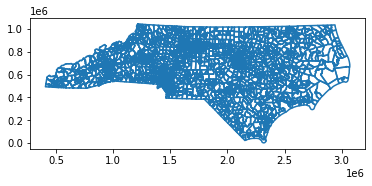

In [301]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST. 

In [302]:
election_results = pd.read_csv('./raw-from-source/SOS/results_pct_20181106/results_pct_20181106.txt', sep='\t', lineterminator='\n')

In [303]:
election_results.head(1)

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,\r
0,ALAMANCE,11/06/2018,064,1228,S,NC COURT OF APPEALS JUDGE SEAT 3,"Michael Monaco, Sr.",LIB,1,59,65,2,1,127,Y,\r


In [304]:
#Read in Sorted precinct files for counties listed by VEST
path = "./raw-from-source/SOS/results_pct_20181106/County Results"
  
# csv files in the path
files = glob.glob(path + "/*.txt")
  
# defining an empty list to store 
# content
nc_2018_counties = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    nc_2018_counties = pd.read_csv(filename, sep='\t', lineterminator='\n')
    content.append(nc_2018_counties)
    
# converting content to data frame
df_2018_cnty = pd.concat(content)
print(df_2018_cnty.shape)
df_2018_cnty.head(1)

(999951, 20)


,county_id,county,election_dt,result_type_lbl,result_type_desc,contest_id,contest_title,contest_party_lbl,contest_vote_for,precinct_code,precinct_name,candidate_id,candidate_name,candidate_party_lbl,group_num,group_name,voting_method_lbl,voting_method_rslt_desc,vote_ct\r,precinct_cd
0,11,BUNCOMBE,11/06/2018,STD,<NORMAL>,743,BUNCOMBE COUNTY BOARD OF COMMISSIONERS DISTRICT 1,NaN,1,01.1,1.1,1638,Al Whitesides,DEM,2,ELECTION DAY,V,Election Day,369,NaN


In [305]:
#Three counties have no precinct_code so copy precinct name for these counties
df_2018_cnty['precinct_code'] = df_2018_cnty.apply(lambda x: x['precinct_name'] if (x['county'] == 'HALIFAX') or (x['county'] == 'NEW HANOVER') or (x['county'] == 'WASHINGTON') else x['precinct_code'], axis=1)

In [306]:
#Get counties using Sorted files and remove from state file
counties = df_2018_cnty.county.unique()
print(counties)
df_2018_cnty.columns = ["county_id","County","Election Date","result_type_lbl","result_type_desc","contest_id","Contest Name","Choice Party","contest_vote_for","Precinct","Precinct Name","candidate_id","Choice","Choice Party","group_num","group_name","voting_method","voting method_rslt","Total Votes","precinct_cd"]
election_results = election_results[~election_results['County'].isin(counties)]

['BUNCOMBE' 'CABARRUS' 'CALDWELL' 'CAMDEN' 'CURRITUCK' 'DARE' 'DAVIDSON'
 'DAVIE' 'DUPLIN' 'DURHAM' 'EDGECOMBE' 'ALLEGHANY' 'GUILFORD' 'HALIFAX'
 'HARNETT' 'HAYWOOD' 'HENDERSON' 'HERTFORD' 'HYDE' 'JOHNSTON' 'JONES'
 'LEE' 'LINCOLN' 'MADISON' 'MCDOWELL' 'MECKLENBURG' 'MOORE' 'NASH'
 'NEW HANOVER' 'NORTHAMPTON' 'ORANGE' 'AVERY' 'PASQUOTANK' 'PITT' 'POLK'
 'RICHMOND' 'BEAUFORT' 'SCOTLAND' 'STOKES' 'SURRY' 'TYRRELL' 'BERTIE'
 'WAKE' 'WASHINGTON' 'WATAUGA' 'WAYNE' 'WILKES' 'YADKIN' 'BLADEN']


In [307]:
#Sum precinct votes for candidates
df_2018_cnty = df_2018_cnty.groupby(['County', 'Contest Name', 'Precinct', 'Choice'])["Total Votes"].sum().reset_index()

In [308]:
#Join election results and county election results
election_results = pd.concat([election_results,df_2018_cnty], axis=0, ignore_index=True)

In [309]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="North Carolina"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
nc_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "37" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [310]:
#Create a list of candidates from the VEST documentation

# List of candidates names from VEST documentation
office_list = ['Barbara Jackson','Christopher (Chris) Anglin','Anita Earls','Andrew T. Heath','John S. Arrowood','Jefferson G. Griffin','Sandra Alice Ray',
        'Tobias (Toby) Hampson','Chuck Kitchen','Allegra Katherine Collins','Michael Monaco, Sr.']
office_list = sorted(office_list)

In [311]:
election_results = election_results[election_results["Choice"].isin(office_list)]

In [312]:
election_results["Choice"].unique()

array(['Michael Monaco, Sr.', 'Anita Earls', 'Barbara Jackson',
       'Christopher (Chris) Anglin', 'Andrew T. Heath',
       'John S. Arrowood', 'Jefferson G. Griffin', 'Sandra Alice Ray',
       'Tobias (Toby) Hampson', 'Allegra Katherine Collins',
       'Chuck Kitchen'], dtype=object)

In [313]:
#Add FIPS columns
election_results["COUNTYFP10"] = election_results["County"].map(nc_fips_dict).fillna(election_results["County"])
vest_shp["COUNTYFP10"] = vest_shp['COUNTY_NAM'].map(nc_fips_dict).fillna(vest_shp['COUNTY_NAM'])

In [314]:
#Clean up precinct column by stripping the white space
election_results["Precinct"]=election_results["Precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTYFP10"]+election_results["Precinct"]

In [315]:
#Run the pivot
pivoted_election_results = pd.pivot_table(election_results,values=["Total Votes"],index=["pivot_col"],columns=["Choice"],aggfunc=sum)

#Fill in N/A with 0
pivoted_election_results = pivoted_election_results.fillna(0)

#Clean the columns
pivoted_election_results.reset_index(drop=False,inplace=True)
pivoted_election_results.columns = pivoted_election_results.columns.droplevel(0)

In [316]:
pivoted_election_results.head(1)

Choice,,Allegra Katherine Collins,Andrew T. Heath,Anita Earls,Barbara Jackson,Christopher (Chris) Anglin,Chuck Kitchen,Jefferson G. Griffin,John S. Arrowood,"Michael Monaco, Sr.",Sandra Alice Ray,Tobias (Toby) Hampson
0,00101,327.0,1426.0,365.0,959.0,474.0,1378.0,1032.0,360.0,85.0,406.0,339.0


In [317]:
pivoted_election_results.rename(columns={ pivoted_election_results.columns[0]: "join_col" }, inplace = True)
pivoted_election_results.columns = pivoted_election_results.columns.get_level_values(0)

In [318]:
#Add FIPS State and County columns
pivoted_election_results.insert(loc=0, column='STATEFP10', value='34')
pivoted_election_results.insert(loc=1, column='COUNTYFP10', value=pivoted_election_results['join_col'].str[0:3])
pivoted_election_results.insert(loc=3, column='Precinct', value=pivoted_election_results['join_col'].str[3:])

In [319]:
pivoted_election_results.head(1)

Choice,STATEFP10,COUNTYFP10,join_col,Precinct,Allegra Katherine Collins,Andrew T. Heath,Anita Earls,Barbara Jackson,Christopher (Chris) Anglin,Chuck Kitchen,Jefferson G. Griffin,John S. Arrowood,"Michael Monaco, Sr.",Sandra Alice Ray,Tobias (Toby) Hampson
0,34,001,00101,01,327.0,1426.0,365.0,959.0,474.0,1378.0,1032.0,360.0,85.0,406.0,339.0


In [320]:
pivoted_election_results.columns = ["STATEFP10","COUNTYFP10","join_col","Precinct","G18SACDCOL","G18SACRHEA","G18SSCDEAR","G18SSCRJAC","G18SSCRANG","G18SACRKIT","G18SACRGRI","G18SACDARR","G18SACLMON","G18SACRRAY","G18SACDHAM"]

In [321]:
pivoted_election_results.head(1)

,STATEFP10,COUNTYFP10,join_col,Precinct,G18SACDCOL,G18SACRHEA,G18SSCDEAR,G18SSCRJAC,G18SSCRANG,G18SACRKIT,G18SACRGRI,G18SACDARR,G18SACLMON,G18SACRRAY,G18SACDHAM
0,34,001,00101,01,327.0,1426.0,365.0,959.0,474.0,1378.0,1032.0,360.0,85.0,406.0,339.0


In [322]:
election_results = pivoted_election_results.copy()

## Compare vote totals before allocation

In [323]:
races = [x for x in vest_shp.columns if 'G18' in x]
races

['G18SSCRJAC',
 'G18SSCRANG',
 'G18SSCDEAR',
 'G18SACRHEA',
 'G18SACDARR',
 'G18SACRGRI',
 'G18SACRRAY',
 'G18SACDHAM',
 'G18SACRKIT',
 'G18SACDCOL',
 'G18SACLMON']

In [324]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

14583329
14584530.0


In [325]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [326]:
searchfor = ['ABS', 'PROVISIONAL','ONE STOP','CURBSIDE','TRANS','OS ','OS-',' OS','PROVISIOINAL','OSAP','OSCA','OSCH','OSKD','OSLL','OSLOB','OSNR','OSOP','OSTA','OSWA','PROVI ']
in_sos =  election_results[election_results["Precinct"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()
in_sos


,COUNTYFP10,G18SACDCOL,G18SACRHEA,G18SSCDEAR,G18SSCRJAC,G18SSCRANG,G18SACRKIT,G18SACRGRI,G18SACDARR,G18SACLMON,G18SACRRAY,G18SACDHAM
0,009,2022.0,3381.0,2094.0,2299.0,1192.0,3213.0,2221.0,2193.0,296.0,1198.0,1978.0
1,011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,019,882.0,1095.0,866.0,778.0,363.0,1063.0,814.0,905.0,60.0,320.0,852.0
6,021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [327]:
election_results = election_results[~election_results["Precinct"].str.contains('|'.join(searchfor))]
election_results = allocate_absentee(election_results,in_sos,races,'COUNTYFP10')
print('Done')

Done


## Compare Election Result Totals

### Compare Vote Totals

In [328]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

14583329
14584530.0


### Compare Race Totals

In [329]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [330]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G18SSCRJAC has a difference of -1003.0 votes
	VEST: 1246263 votes
	SOURCES: 1247266.0 votes
G18SSCRANG has a difference of -114.0 votes
	VEST: 598753 votes
	SOURCES: 598867.0 votes
G18SSCDEAR has a difference of -446.0 votes
	VEST: 1812751 votes
	SOURCES: 1813197.0 votes
G18SACRHEA has a difference of -1080.0 votes
	VEST: 1797929 votes
	SOURCES: 1799009.0 votes
G18SACDARR has a difference of -664.0 votes
	VEST: 1855728 votes
	SOURCES: 1856392.0 votes
G18SACRGRI has a difference of -1065.0 votes
	VEST: 1293098 votes
	SOURCES: 1294163.0 votes
G18SACRRAY has a difference of -372.0 votes
	VEST: 561015 votes
	SOURCES: 561387.0 votes
G18SACDHAM has a difference of -75.0 votes
	VEST: 1766470 votes
	SOURCES: 1766545.0 votes
G18SACRKIT has a difference of -967.0 votes
	VEST: 1709847 votes
	SOURCES: 1710814.0 votes
G18SACDCOL has a difference of -590.0 votes
	VEST: 1773702 votes
	SOURCES: 1774292.0 votes
G18SACLMON has a difference of 5175.0 votes
	VEST: 167773 votes

## Differences in State Totals 
VEST State totals match official state totals. Our totals are off because of what appears to be an error in the North Carolina "Precinct Sorted Results". In counties where VEST used these files we did as well and the totals do not appear to match.  We assume that VEST did some deallocation that we were not able to do.

### Compare County Totals

In [331]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [332]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP10')

***Countywide Totals Check***

G18SSCRJAC contains differences in these counties:
	013 has a difference of -4.0 votes
		VEST: 7905 votes
		SOURCES: 7909.0 votes
	015 has a difference of -21.0 votes
		VEST: 1743 votes
		SOURCES: 1764.0 votes
	017 has a difference of -20.0 votes
		VEST: 5015 votes
		SOURCES: 5035.0 votes
	021 has a difference of -63.0 votes
		VEST: 32758 votes
		SOURCES: 32821.0 votes
	025 has a difference of -1.0 votes
		VEST: 25368 votes
		SOURCES: 25369.0 votes
	055 has a difference of -4.0 votes
		VEST: 6248 votes
		SOURCES: 6252.0 votes
	057 has a difference of -14.0 votes
		VEST: 24459 votes
		SOURCES: 24473.0 votes
	063 has a difference of -80.0 votes
		VEST: 17348 votes
		SOURCES: 17428.0 votes
	081 has a difference of -301.0 votes
		VEST: 53224 votes
		SOURCES: 53525.0 votes
	083 has a difference of -38.0 votes
		VEST: 3873 votes
		SOURCES: 3911.0 votes
	087 has a difference of -26.0 votes
		VEST: 9387 votes
		SOURCES: 9413.0 votes
	089 has a difference of -11.0

## Attempt to Join

In [333]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP10']+vest_shp['PREC_ID']

In [334]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

2715
2715
2706
2706


In [335]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [336]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PREC_ID"])
print(len(empty_precincts))

0


In [337]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

9


## Attempt Join

In [338]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2634
left_only       81
right_only      72
Name: _merge, dtype: int64


In [339]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','Precinct','G18SSCRJAC_x','COUNTYFP10_y','PREC_ID','join_col']]

,COUNTYFP10_x,Precinct,G18SSCRJAC_x,COUNTYFP10_y,PREC_ID,join_col
1178,083,BUTWD_BUTTERWOOD,64.0,NaN,NaN,083BUTWD_BUTTERWOOD
1179,083,CONC_CONOCONNARA,35.0,NaN,NaN,083CONC_CONOCONNARA
1180,083,ENF 2_ENFIELD 2,50.0,NaN,NaN,083ENF 2_ENFIELD 2
1181,083,ENF1_ENFIELD 1,100.0,NaN,NaN,083ENF1_ENFIELD 1
1182,083,FAUCT_FAUCETT,176.0,NaN,NaN,083FAUCT_FAUCETT
1183,083,HAL_HALIFAX,101.0,NaN,NaN,083HAL_HALIFAX
1184,083,HOL_HOLLISTER,33.0,NaN,NaN,083HOL_HOLLISTER
1185,083,HPR_HOBGOOD,140.0,NaN,NaN,083HPR_HOBGOOD
1186,083,LIT 1_LITTLETON 1,132.0,NaN,NaN,083LIT 1_LITTLETON 1
1187,083,LIT 2_LITTLETON 2,318.0,NaN,NaN,083LIT 2_LITTLETON 2


In [340]:
nc_dict = {'083BUTWD_BUTTERWOOD': '083BUTWD',
 '083CONC_CONOCONNARA': '083CONC',
 '083ENF 2_ENFIELD 2': '083ENF 2',
 '083ENF1_ENFIELD 1': '083ENF1',
 '083FAUCT_FAUCETT': '083FAUCT',
 '083HAL_HALIFAX': '083HAL',
 '083HOL_HOLLISTER': '083HOL',
 '083HPR_HOBGOOD': '083HPR',
 '083LIT 1_LITTLETON 1': '083LIT 1',
 '083LIT 2_LITTLETON 2': '083LIT 2',
 '083RINGW_RINGWOOD': '083RINGW',
 '083RR 10_ROANOKE RAPIDS 10': '083RR 10',
 '083RR 11_ROANOKE RAPIDS 11': '083RR 11',
 '083RR 3_ROANOKE RAPIDS 3': '083RR 3',
 '083RR 4_ROANOKE RAPIDS 4': '083RR 4',
 '083RR 5_ROANOKE RAPIDS 5': '083RR 5',
 '083RR 7_ROANOKE RAPIDS 7': '083RR 7',
 '083RR 9_ROANOKE RAPIDS 9': '083RR 9',
 '083RR1-2_ROANOKE RAPIDS 1-2': '083RR1-2',
 '083RRC_ROANOKE RAPIDS CIVIC': '083RRC',
 '083SN_SCOTLAND NECK': '083SN',
 '083WEL 3_WELDON 3': '083WEL 3',
 '083WEL1-2_WELDON 1-2': '083WEL1-2',
 '129CF01_CF01': '129CF01',
 '129CF02_CF02': '129CF02',
 '129CF05_CF05': '129CF05',
 '129CF06_CF06': '129CF06',
 '129FP03_FP03': '129FP03',
 '129FP04_FP04': '129FP04',
 '129FP06_FP06': '129FP06',
 '129FP07_FP07': '129FP07',
 '129FP08_FP08': '129FP08',
 '129H01_H01': '129H01',
 '129H02_H02': '129H02',
 '129H03_H03': '129H03',
 '129H04_H04': '129H04',
 '129H05_H05': '129H05',
 '129H06_H06': '129H06',
 '129H08_H08': '129H08',
 '129H10_H10': '129H10',
 '129H11_H11': '129H11',
 '129H12_H12': '129H12',
 '129H13_H13': '129H13',
 '129M02_M02': '129M02',
 '129M03_M03': '129M03',
 '129M04_M04': '129M04',
 '129M06_M06': '129M06',
 '129M07_M07': '129M07',
 '129W03_W03': '129W03',
 '129W08_W08': '129W08',
 '129W12_W12': '129W12',
 '129W13_W13': '129W13',
 '129W15_W15': '129W15',
 '129W16_W16': '129W16',
 '129W17_W17': '129W17',
 '129W18_W18': '129W18',
 '129W21_W21': '129W21',
 '129W24_W24': '129W24',
 '129W25_W25': '129W25',
 '129W26_W26': '129W26',
 '129W27_W27': '129W27',
 '129W28_W28': '129W28',
 '129W29_W29': '129W29',
 '129W30_W30': '129W30',
 '129W31_W31': '129W31',
 '129WB_WB': '129WB',
 '187LM_LEES MILL': '187LM',
 '187P1_PLYMOUTH 1': '187P1',
 '187P2_PLYMOUTH 2': '187P2',
 '187P3_PLYMOUTH 3': '187P3',
 '187SC_SCUPPERNONG': '187SC',
 '187SK_SKINNERSVILLE': '187SK'}

In [341]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(nc_dict).fillna(election_results["join_col"])

## Join Attempt 2

In [342]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          2706
left_only        9
right_only       0
Name: _merge, dtype: int64


In [343]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTYFP10_x','Precinct','G18SSCRJAC_x','COUNTYFP10_y','PREC_ID','join_col']]

,COUNTYFP10_x,Precinct,G18SSCRJAC_x,COUNTYFP10_y,PREC_ID,join_col
1311,095,PROV,0.0,NaN,NaN,095PROV
1357,101,CLAYTON,0.0,NaN,NaN,101CLAYTON
1358,101,CLEVELAND,0.0,NaN,NaN,101CLEVELAND
1395,101,SMITHFIELD,0.0,NaN,NaN,101SMITHFIELD
1869,135,BOE,0.0,NaN,NaN,135BOE
1872,135,CARRBORO TOWN HALL,0.0,NaN,NaN,135CARRBORO TOWN HALL
1878,135,CHAPEL OF THE CROSS,0.0,NaN,NaN,135CHAPEL OF THE CROSS
1888,135,EFLAND,0.0,NaN,NaN,135EFLAND
1907,135,SEYMOUR SENIOR CENTER,0.0,NaN,NaN,135SEYMOUR SENIOR CENTER


### Compare Precinct Votes

In [344]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [345]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'PREC_ID')

G18SSCRJAC ....................................................................0002 (S) ..112  (V)..187 (D):  -75
G18SSCRANG ....................................................................0002 (S) ...92  (V)..137 (D):  -45
G18SSCDEAR ....................................................................0002 (S) ..150  (V)..158 (D):   -8
G18SACRHEA ....................................................................0002 (S) ..187  (V)..316 (D): -129
G18SACDARR ....................................................................0002 (S) ..165  (V)..163 (D):    2
G18SACRGRI ....................................................................0002 (S) ..141  (V)..225 (D):  -84
G18SACRRAY ....................................................................0002 (S) ...62  (V)..102 (D):  -40
G18SACDHAM ....................................................................0002 (S) ..149  (V)..152 (D):   -3
G18SACRKIT ....................................................................0002 (S) 

## Differences in Precinct totals  
  
There are a number of differences in the Precinct Totals. This is most likely due to the fact that VEST used precinct-sorted data for 39 counties.

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the North Carolina State Board of Elections: SBE_PRECINCTS_20170519.zip from  
source-https://dl.ncsbe.gov/?prefix=PrecinctMaps/ https://www.ncsbe.gov/results-data/voting-maps-redistricting

### Precinct Shapefiles

In [346]:
shapefiles_nc = gp.read_file('./raw-from-source/SOS/SBE_PRECINCTS_20170519/Precincts2.shp')

In [347]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_nc = shapefiles_nc.to_crs(3857)

In [348]:
shapefiles_nc.head(1)

PREC_ID          ENR_DESC COUNTY_NAM OF_PREC_ID  COUNTY_ID  \
0     06N  06N_NORTH GRAHAM   ALAMANCE       None          1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<AxesSubplot:>

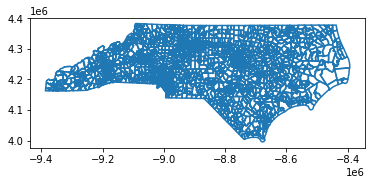

In [349]:
shapefiles_nc.boundary.plot()

In [350]:
print(shapefiles_nc.shape)
vest_shp.shape

(2706, 6)


(2706, 18)

<AxesSubplot:>

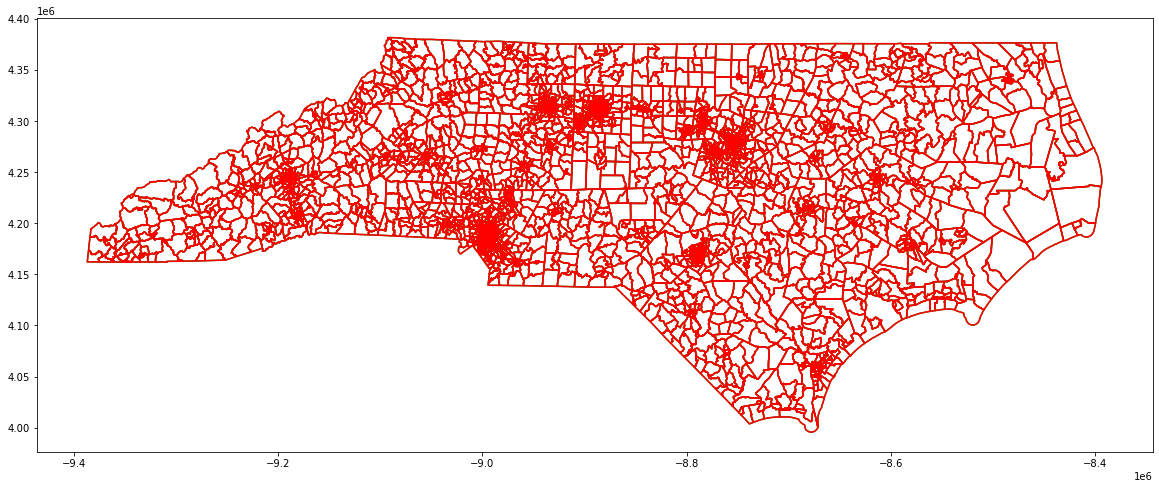

In [351]:
ax = shapefiles_nc.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [352]:
shapefiles_nc["COUNTYFP10"] = shapefiles_nc["COUNTY_NAM"].map(nc_fips_dict).fillna(shapefiles_nc["COUNTY_NAM"])

In [353]:
shapefiles_nc["join_col"]=shapefiles_nc['COUNTYFP10']+shapefiles_nc['PREC_ID']

In [354]:
join_attempt_one = pd.merge(shapefiles_nc,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2706
right_only       9
left_only        0
Name: _merge, dtype: int64


In [355]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','PREC_ID','COUNTYFP10_y','Precinct','join_col']]

,COUNTYFP10_x,PREC_ID,COUNTYFP10_y,Precinct,join_col
2706,NaN,NaN,095,PROV,095PROV
2707,NaN,NaN,101,CLAYTON,101CLAYTON
2708,NaN,NaN,101,CLEVELAND,101CLEVELAND
2709,NaN,NaN,101,SMITHFIELD,101SMITHFIELD
2710,NaN,NaN,135,BOE,135BOE
2711,NaN,NaN,135,CARRBORO TOWN HALL,135CARRBORO TOWN HALL
2712,NaN,NaN,135,CHAPEL OF THE CROSS,135CHAPEL OF THE CROSS
2713,NaN,NaN,135,EFLAND,135EFLAND
2714,NaN,NaN,135,SEYMOUR SENIOR CENTER,135SEYMOUR SENIOR CENTER


In [356]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(nc_dict).fillna(election_results["join_col"])

In [357]:
shapefiles_nc_comp = join_attempt_one[join_attempt_one['_merge'] == 'both']

In [358]:
final_merge = pd.merge(shapefiles_nc_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          2706
left_only        0
right_only       0
Name: final_merge, dtype: int64

In [359]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True    2706
dtype: int64


In [360]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [361]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2706, 1)
2706 precincts w/ a difference of 0 km^2
0 precincts w/ a difference between 0 and 0.1 km^2
0 precincts w/ a difference between 0.1 and 0.5 km^2
0 precincts w/ a difference between 0.5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2
